### Download speeches for a sample senator

In [4]:
import urllib.request
import xml.etree.ElementTree as ET
import csv
import re
import sys
import matplotlib.pyplot as plt

TAG_RE = re.compile(r'<[^>]+>')
SPACE_RE = re.compile('&nbsp;')

In [ ]:
SENATOR_ID = 3398
MAX_SPEECHES = 100
f = urllib.request.urlopen("http://legis.senado.leg.br/dadosabertos/senador/"+ str(SENATOR_ID) +"/discursos")
raw = f.read()
root = ET.fromstring(raw)

print("Downloading speeches ")
parlamentar = root.find('Parlamentar')
i = 0
alltexts = ''
with open("output/senator-speeches.csv", "w", encoding='utf-8') as ofile:
    writer = csv.writer(ofile, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    id = parlamentar.find("IdentificacaoParlamentar")
    for pr in parlamentar.find("Pronunciamentos").iter('Pronunciamento'):
        i = i + 1
        try:
    #         http://www25.senado.leg.br/web/atividade/pronunciamentos/-/p/texto/427686
            urlTexto = pr.find('UrlTexto').text
            f = urllib.request.urlopen(urlTexto)
            html = f.read().decode('utf-8')
    #         print('>>>' + html)

            html_frag = re.search('texto-integral">(.*)<div class="FooterMain"', html)
            if html_frag != None:
                text = TAG_RE.sub('', html_frag.group(1))
                text = SPACE_RE.sub('', text)
        #         print(text)

                row = [ id.find('CodigoParlamentar').text,
                        id.find('NomeParlamentar').text,
                        id.find('SexoParlamentar').text,
                        pr.find('SiglaTipoPronunciamento').text,
                        pr.find('DataPronunciamento').text,
                        pr.find('SiglaPartidoParlamentarNaData').text,
                        pr.find('UfParlamentarNaData').text,
                        pr.find('NomeCasaPronunciamento').text,
                        text,
                      ]
                writer.writerow(row)
        #         print('>>>> ' + text)
                alltexts = alltexts + '\n' + text
        #         print("speech " + row[1] + " " + row[4])
                sys.stdout.write('.')
            else:
                print("Unavailable " + urlTexto)

            if i > MAX_SPEECHES:
                break
        except:
            if i > MAX_SPEECHES:
                break
            

print("Done")

.......................................................................................

### Word cloud

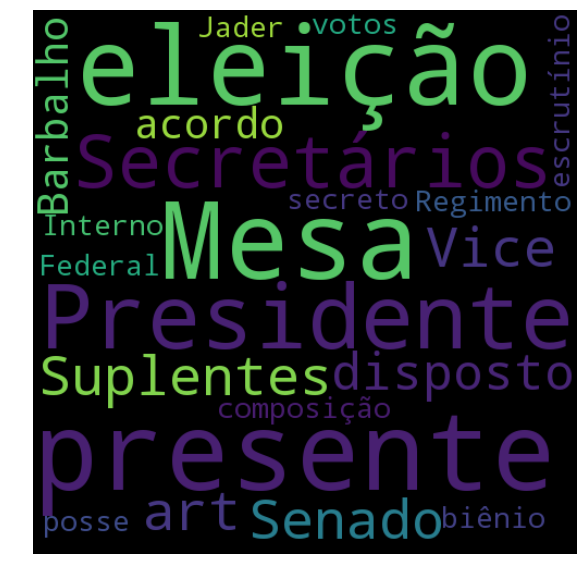

In [50]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8'))
# print(stopwords)

# Generate a word cloud image
wc = WordCloud(background_color="black", max_words=300,
               stopwords=stopwords, max_font_size=100, random_state=42,
               width=500, height=500)

wordcloud = wc.generate(text)
plt.figure(figsize=(20,10))
# plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()